<a href="https://www.kaggle.com/code/sonalanand/daily-practise-pands-mix-questions?scriptVersionId=235939654" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🎧 Short Spotify Data Project – 5 Fresh Visual Explorations

Today’s quick project builds on the Spotify dataset to explore new angles with fresh visualisations.  
Each question uncovers a different musical dimension — from energy levels to popularity insights — and ends with a meaningful visual.

---

### 🧰 Key Columns We’ll Use:
- `key`, `mode`, `energy_%`, `valence_%`, `streams`, `bpm`, `danceability_%`, `artist(s)_name`, `track_name`

---

### ✅ Questions Covered in this Project:

1. Which musical **key** has the highest average **energy**?
2. What is the **most common BPM** range, and how does it correlate with average **valence**?
3. Which **mood** dominates the top streamed tracks? (Based on valence and energy categorisation)
4. Do higher **danceability** tracks always have higher **streams**?
5. What are the **top 5 most popular artists** by average energy and how consistent are they?

Each question ends in a visual (bar, pie, heatmap, scatter, or line) to bring clarity to the data.

Let’s dive into  👇


In [1]:
import os

# List all files and folders in /kaggle/input
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spotify-dataset-for-self-practise/spotify_2023.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Correct file path based on the output
file_path = "/kaggle/input/spotify-dataset-for-self-practise/spotify_2023.csv"

# Load the CSV file
try:
    df = pd.read_csv(file_path, encoding="ISO-8859-1")
    print("Dataset loaded successfully.")
    print(df.head())
except FileNotFoundError:
    print(f"File not found: {file_path}. Please check the file path.")

Dataset loaded successfully.
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                

✅ Q1 --- Which musical **key** has the highest average **energy**??

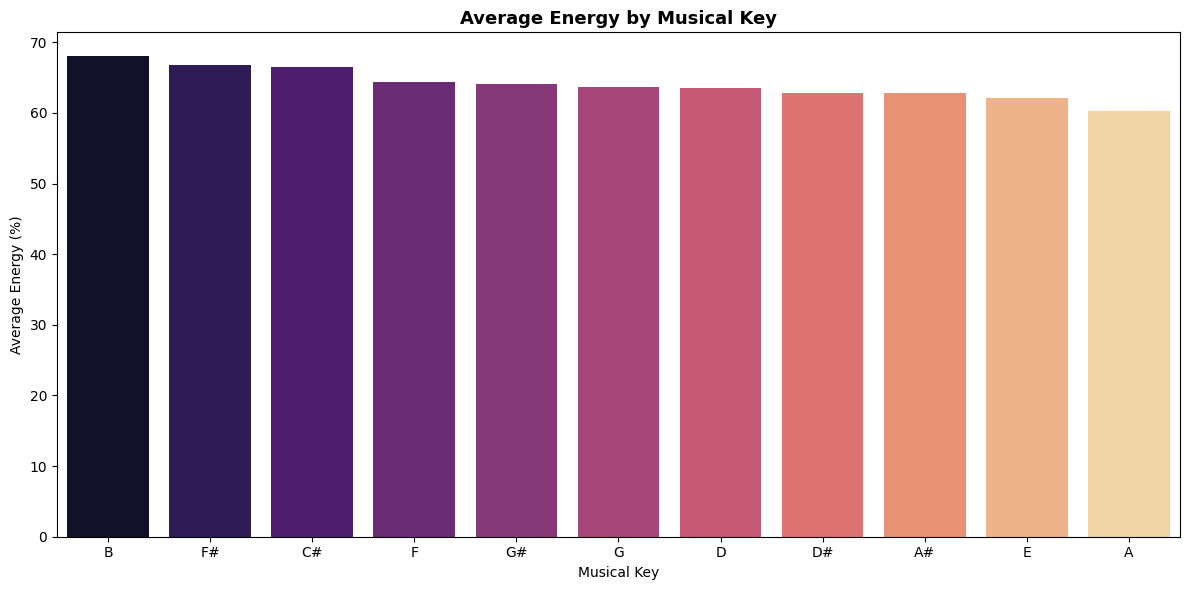

In [3]:

# Step 1: Group by musical key and calculate average energy
key_energy = df.groupby('key')['energy_%'].mean().reset_index().sort_values(by='energy_%', ascending=False)

# Step 2: Plotting average energy by musical key
plt.figure(figsize=(12, 6))
sns.barplot(data=key_energy, x='key', y='energy_%', palette='magma')

plt.title('Average Energy by Musical Key', fontsize=13, fontweight='bold')
plt.xlabel('Musical Key')
plt.ylabel('Average Energy (%)')
plt.tight_layout()
plt.show()


✅ Q2 --- What is the most common BPM range, and how does it correlate with average valence?

/tmp/ipykernel_13/3349424094.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bpm_valence = df.groupby('bpm_range')['valence_%'].mean().reset_index().sort_values(by='valence_%', ascending=False)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


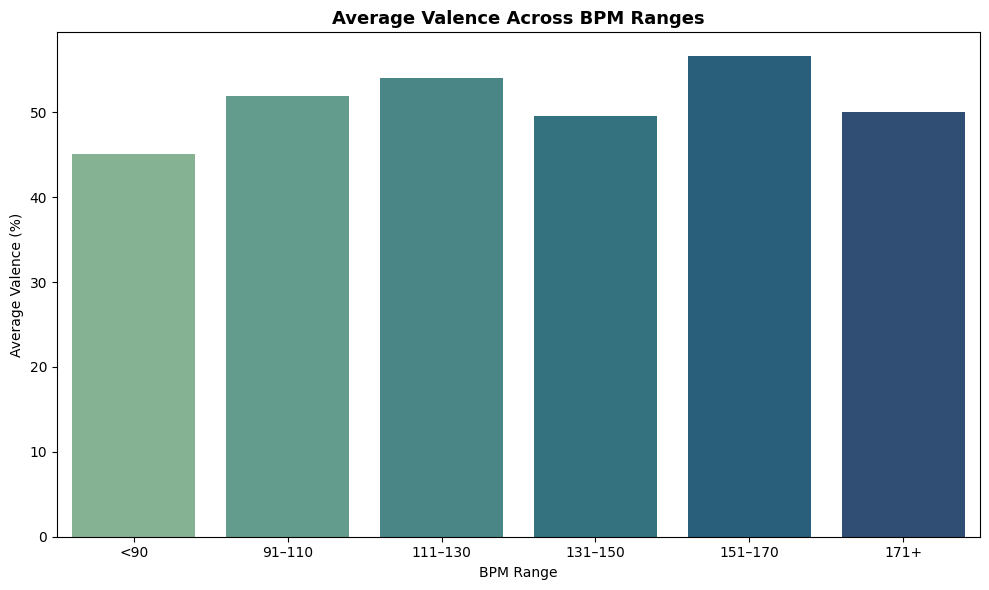

In [4]:


# Step 1: Define BPM bins and labels
bins = [0, 90, 110, 130, 150, 170, 200]
labels = ['<90', '91–110', '111–130', '131–150', '151–170', '171+']

df['bpm_range'] = pd.cut(df['bpm'], bins=bins, labels=labels)

# Step 2: Group by BPM range and calculate average valence
bpm_valence = df.groupby('bpm_range')['valence_%'].mean().reset_index().sort_values(by='valence_%', ascending=False)

# Step 3: Plotting average valence by BPM range
plt.figure(figsize=(10, 6))
sns.barplot(data=bpm_valence, x='bpm_range', y='valence_%', palette='crest')

plt.title('Average Valence Across BPM Ranges', fontsize=13, fontweight='bold')
plt.xlabel('BPM Range')
plt.ylabel('Average Valence (%)')
plt.tight_layout()
plt.show()


✅ Q3 --- Which mood dominates the top streamed tracks?

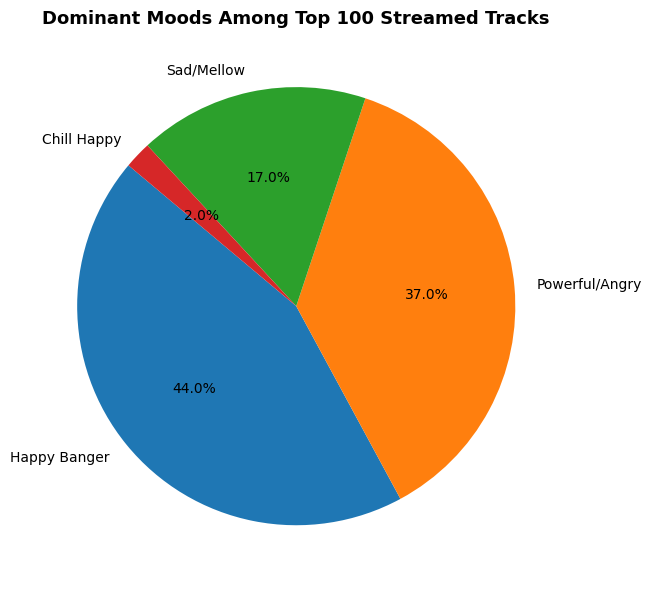

In [5]:
# Step 1: Define mood based on valence and energy thresholds
def mood_category(row):
    if row['valence_%'] > 50 and row['energy_%'] > 50:
        return 'Happy Banger'
    elif row['valence_%'] > 50 and row['energy_%'] <= 50:
        return 'Chill Happy'
    elif row['valence_%'] <= 50 and row['energy_%'] > 50:
        return 'Powerful/Angry'
    else:
        return 'Sad/Mellow'

df['song_mood'] = df.apply(mood_category, axis=1)

# Step 2: Select top 100 streamed songs
top_100 = df.sort_values(by='streams', ascending=False).head(100)

# Step 3: Count song mood occurrences in top 100
mood_counts = top_100['song_mood'].value_counts().reset_index()
mood_counts.columns = ['Mood', 'Count']

# Step 4: Pie chart of mood distribution
plt.figure(figsize=(8, 6))
plt.pie(mood_counts['Count'], labels=mood_counts['Mood'], autopct='%1.1f%%', startangle=140)
plt.title('Dominant Moods Among Top 100 Streamed Tracks', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()


✅ Q4 --- Do higher danceability tracks always have higher streams?

In [6]:
# Convert 'streams' column to numeric if not already
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')


/tmp/ipykernel_13/95304031.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  danceability_streams = df.groupby('danceability_range')['streams'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


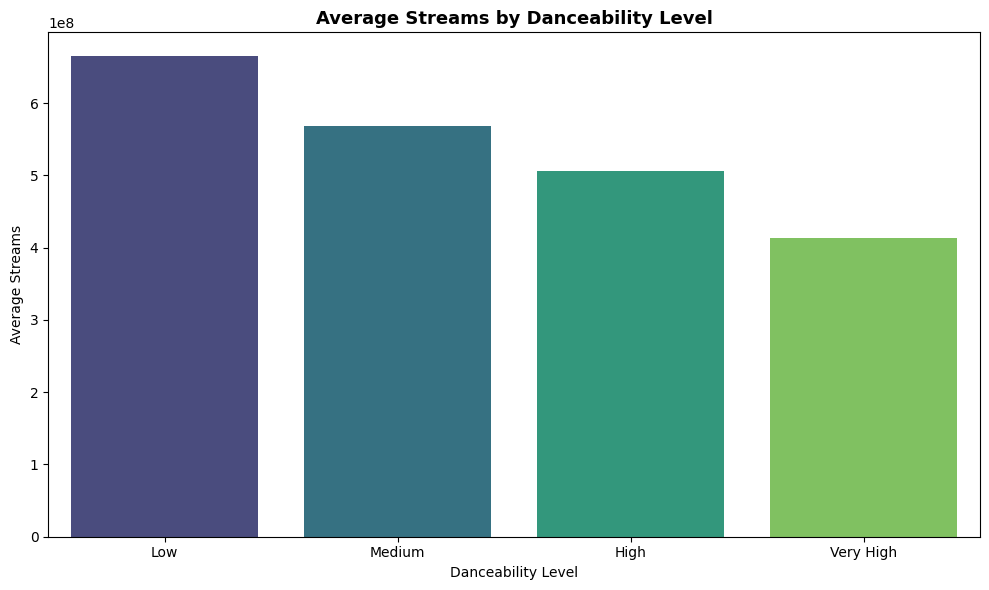

In [7]:
# Step 1: Create bins for danceability
dance_bins = [0, 40, 60, 80, 100]
labels = ['Low', 'Medium', 'High', 'Very High']

df['danceability_range'] = pd.cut(df['danceability_%'], bins=dance_bins, labels=labels)

# Step 2: Group by danceability range and calculate average streams
danceability_streams = df.groupby('danceability_range')['streams'].mean().reset_index()

# Step 3: Bar plot to visualise average streams by danceability
plt.figure(figsize=(10, 6))
sns.barplot(data=danceability_streams, x='danceability_range', y='streams', palette='viridis')

plt.title('Average Streams by Danceability Level', fontsize=13, fontweight='bold')
plt.xlabel('Danceability Level')
plt.ylabel('Average Streams')
plt.tight_layout()
plt.show()


✅ Q5 --- What are the top 5 most popular artists by average energy and how consistent are they?

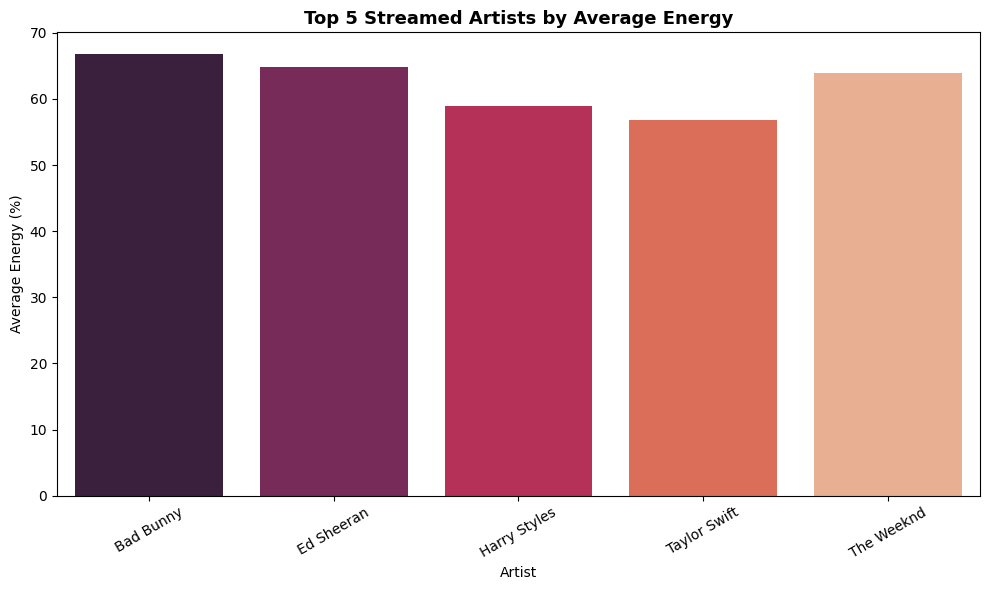

In [8]:
# Step 1: Ensure 'streams' is numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Step 2: Find top 5 most streamed artists
top_artists = df.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(5).index

# Step 3: Filter dataset to those top artists
top_artist_df = df[df['artist(s)_name'].isin(top_artists)]

# Step 4: Group by artist and get average energy
top_artist_energy = top_artist_df.groupby('artist(s)_name')['energy_%'].mean().reset_index()

# Step 5: Bar plot for average energy of top 5 artists
plt.figure(figsize=(10, 6))
sns.barplot(data=top_artist_energy, x='artist(s)_name', y='energy_%', palette='rocket')

plt.title('Top 5 Streamed Artists by Average Energy', fontsize=13, fontweight='bold')
plt.xlabel('Artist')
plt.ylabel('Average Energy (%)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
